In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
from bokeh.layouts import layout
from bokeh.models.widgets import Dropdown
from bokeh.models import CustomJS, Slider, ColumnDataSource, WidgetBox,Button, RadioButtonGroup, Select,Panel,Tabs

In [3]:
#Visualization libraries
import matplotlib
import bokeh
from bokeh import mpl
from bokeh.charts import Line,HeatMap
from bokeh.charts import Histogram,Scatter
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook,hplot
output_notebook()

Loading BokehJS ...

In [4]:
import seaborn as sns
sns.set_style('whitegrid') #sets the grid-color of the seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#This helps to read stock information from Yahoo finance
from pandas_datareader.data import  DataReader

In [6]:
from datetime import datetime

In [7]:
from __future__ import division

In [8]:
stock_list = ['AAPL','GOOG','MSFT','AMZN']

In [9]:
end_date = datetime.now()

start_date = datetime(end_date.year-1,end_date.month,end_date.day)

In [10]:
for stocks in stock_list:
    globals()[stocks] = DataReader(stocks,'yahoo',start_date,end_date)

In [11]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-04-25,105.000000,105.650002,104.510002,105.080002,28031600,102.904573
2016-04-26,103.910004,105.300003,103.910004,104.349998,56016200,102.189682
2016-04-27,96.000000,98.709999,95.680000,97.820000,114602100,95.794871
2016-04-28,97.610001,97.879997,94.250000,94.830002,82242700,92.866774
2016-04-29,93.989998,94.720001,92.510002,93.739998,68531500,91.799336


In [12]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-04-25,716.099976,723.929993,715.590027,723.150024,1959200,723.150024
2016-04-26,725.419983,725.765991,703.026001,708.140015,2744600,708.140015
2016-04-27,707.289978,708.979980,692.364990,705.840027,3098600,705.840027
2016-04-28,708.260010,714.169983,689.549988,691.020020,2867300,691.020020
2016-04-29,690.700012,697.619995,689.000000,693.010010,2487700,693.010010


In [13]:
MSFT.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-04-25,51.779999,52.130001,51.630001,52.110001,33226900,50.774611
2016-04-26,52.259998,52.349998,51.090000,51.439999,33532600,50.121779
2016-04-27,51.480000,51.500000,50.549999,50.939999,43369300,49.634592
2016-04-28,50.619999,50.770000,49.560001,49.900002,43134800,48.621246
2016-04-29,49.349998,50.250000,49.349998,49.869999,48411700,48.592012


In [14]:
AMZN.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-04-25,616.609985,626.979980,616.250000,626.200012,2682900,626.200012
2016-04-26,626.169983,626.750000,614.880005,616.880005,2521400,616.880005
2016-04-27,611.799988,615.950012,601.280029,606.570007,4068800,606.570007
2016-04-28,615.539978,626.799988,599.200012,602.000000,7872600,602.000000
2016-04-29,666.000000,669.979980,654.000000,659.590027,10310700,659.590027


In [15]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,114.167331,115.005299,113.510040,114.331833,3.310689e+07,113.508623
std,15.275144,15.252927,15.327597,15.329373,1.577185e+07,15.830200
min,90.000000,91.669998,89.470001,90.339996,1.147590e+07,89.008370
25%,101.325001,103.119999,101.134998,101.680001,2.378155e+07,100.181220
50%,111.639999,113.029999,111.389999,111.800003,2.852880e+07,111.307418
75%,120.000000,120.474998,119.720001,120.000000,3.630755e+07,119.481976
max,144.289993,145.460007,143.809998,144.770004,1.146021e+08,144.770004


In [16]:
#plotting adjusted-close price of Apple's stock
p1=Line(AAPL['Adj Close'],title='APPLE-Adj-Close',xlabel='Date',ylabel="",plot_width=700,plot_height=300) 
#show(p1)
#plt.close()

In [17]:
p2=Line(GOOG['Adj Close'],title='GOOGLE-Adj-Close',xlabel='Date',ylabel="",plot_width=700,plot_height=300) 
#show(p2)

In [18]:
p3=Line(MSFT['Adj Close'],title='MICROSOFT-Adj-Close',xlabel='Date',ylabel="",plot_width=700,plot_height=300) 
#show(p3)

In [19]:
p4=Line(AMZN['Adj Close'],title='AMAZON-Adj-Close',xlabel='Date',ylabel="",plot_width=700,plot_height=300) 
#show(p4)

In [20]:
tab1 = Panel(child=p1,title='Apple')
tab2 = Panel(child=p2,title='Google')
tab3 = Panel(child=p3,title='Microsoft')
tab4 = Panel(child=p4,title='Amazon')
tabs1 = Tabs(tabs=[tab1,tab2,tab3,tab4])
output_file('Adj-Close.html')
show(tabs1)
#select = Select(title="Option:", value="foo", options=["foo", "bar", "baz", "quux"])
#print show(WidgetBox(select,width=300))

In [21]:
ma_day=[10,20,50]
for ma in ma_day:
    column_name="MA for %s days" %(str(ma))
    
    AAPL[column_name]=AAPL['Adj Close'].rolling(window=ma).mean()
    GOOG[column_name]=GOOG['Adj Close'].rolling(window=ma).mean()
    MSFT[column_name]=MSFT['Adj Close'].rolling(window=ma).mean()
    AMZN[column_name]=AMZN['Adj Close'].rolling(window=ma).mean()

In [22]:
p5=Line(AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']],xlabel='Date',ylabel="",plot_width=700,plot_height=300)
#plot(subplots=False,figsize=(10,4))
#show(p)

In [23]:
p6=Line(GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']],xlabel='Date',ylabel="",plot_width=700,plot_height=300)
#show(p)

In [24]:
p7=Line(MSFT[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']],xlabel='Date',ylabel="",plot_width=700,plot_height=300)
#show(p)

In [25]:
p8=Line(AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']],xlabel='Date',ylabel="",plot_width=700,plot_height=300)
#show(p)

In [26]:
tab5 = Panel(child=p5,title='Apple')
tab6 = Panel(child=p6,title='Google')
tab7 = Panel(child=p7,title='Microsoft')
tab8 = Panel(child=p8,title='Amazon')
tabs2 = Tabs(tabs=[tab5,tab6,tab7,tab8])
output_file('Moving-Average.html')
show(tabs2)
select = Select(title="Option:", value="foo", options=["foo", "bar", "baz", "quux"])
#print show(WidgetBox(select,width=300))
#tabs=[]

INFO:bokeh.core.state:Session output file 'Moving-Average.html' already exists, will be overwritten.


In [27]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()
p9=Line(AAPL['Daily Return'],xlabel='Date',ylabel="",plot_width=700,plot_height=300)
p10=Line(GOOG['Daily Return'],xlabel='Date',ylabel="",plot_width=700,plot_height=300)
p11=Line(MSFT['Daily Return'],xlabel='Date',ylabel="",plot_width=700,plot_height=300)
p12=Line(AMZN['Daily Return'],xlabel='Date',ylabel="",plot_width=700,plot_height=300)

In [28]:
tab9 = Panel(child=p9,title='Apple')
tab10 = Panel(child=p10,title='Google')
tab11 = Panel(child=p11,title='Microsoft')
tab12 = Panel(child=p12,title='Amazon')
tabs3 = Tabs(tabs=[tab9,tab10,tab11,tab12])
output_file('Daily Return.html')
show(tabs3)
#select = Select(title="Option:", value="foo", options=["foo", "bar", "baz", "quux"])
#print show(WidgetBox(select,width=300))
#tabs=[]

INFO:bokeh.core.state:Session output file 'Daily Return.html' already exists, will be overwritten.


In [29]:
'''#sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')
p=Histogram(AAPL['Daily Return'].dropna())
output_file('distplot.html')
show(p)
show(mpl.to_bokeh())
#plt.show(subplots=False)'''

"#sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')\np=Histogram(AAPL['Daily Return'].dropna())\noutput_file('distplot.html')\nshow(p)\nshow(mpl.to_bokeh())\n#plt.show(subplots=False)"

In [30]:
p13 = Histogram(AAPL['Daily Return'].dropna(),bins=100,plot_height=300)
p14 = Histogram(GOOG['Daily Return'].dropna(),bins=100,plot_height=300)
p15 = Histogram(MSFT['Daily Return'].dropna(),bins=100,plot_height=300)
p16 = Histogram(AMZN['Daily Return'].dropna(),bins=100,plot_height=300)

In [31]:
tab13 = Panel(child=p13,title='Apple')
tab14 = Panel(child=p14,title='Google')
tab15 = Panel(child=p15,title='Microsoft')
tab16 = Panel(child=p16,title='Amazon')
tabs4 = Tabs(tabs=[tab13,tab14,tab15,tab16])
output_file('Histogram.html')
show(tabs4)

INFO:bokeh.core.state:Session output file 'Histogram.html' already exists, will be overwritten.


In [32]:
closing_df = DataReader(stock_list,'yahoo',start_date,end_date)['Adj Close']

In [33]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-04-25,102.904573,626.200012,723.150024,50.774611
2016-04-26,102.189682,616.880005,708.140015,50.121779
2016-04-27,95.794871,606.570007,705.840027,49.634592
2016-04-28,92.866774,602.000000,691.020020,48.621246
2016-04-29,91.799336,659.590027,693.010010,48.592012


In [34]:
stock_rets = closing_df.pct_change() #daily returns of all the stocks

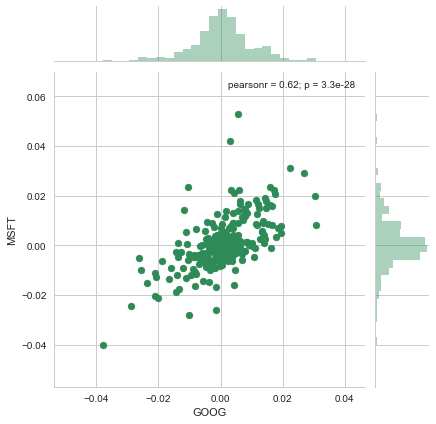

In [35]:
sns.jointplot('GOOG','MSFT',stock_rets,kind='scatter',color='seagreen')

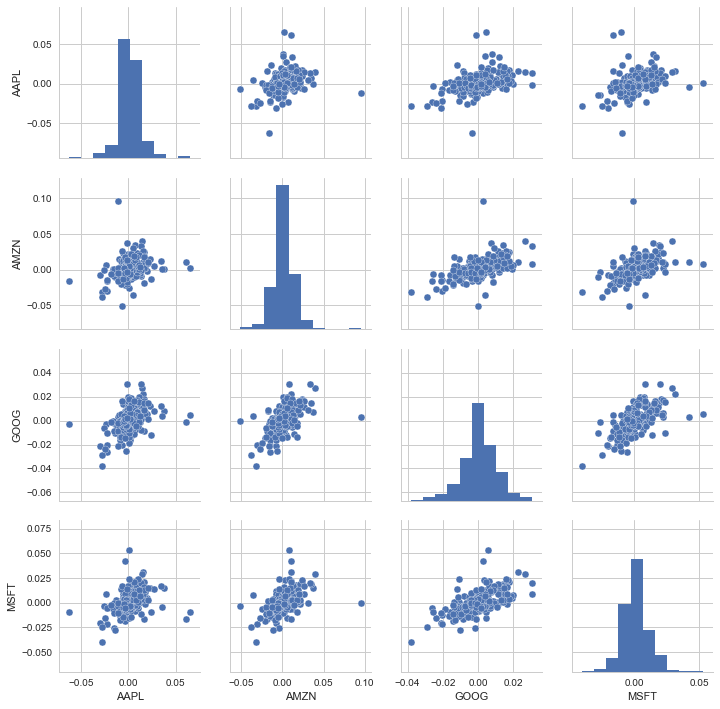

In [36]:
sns.pairplot(stock_rets.dropna())

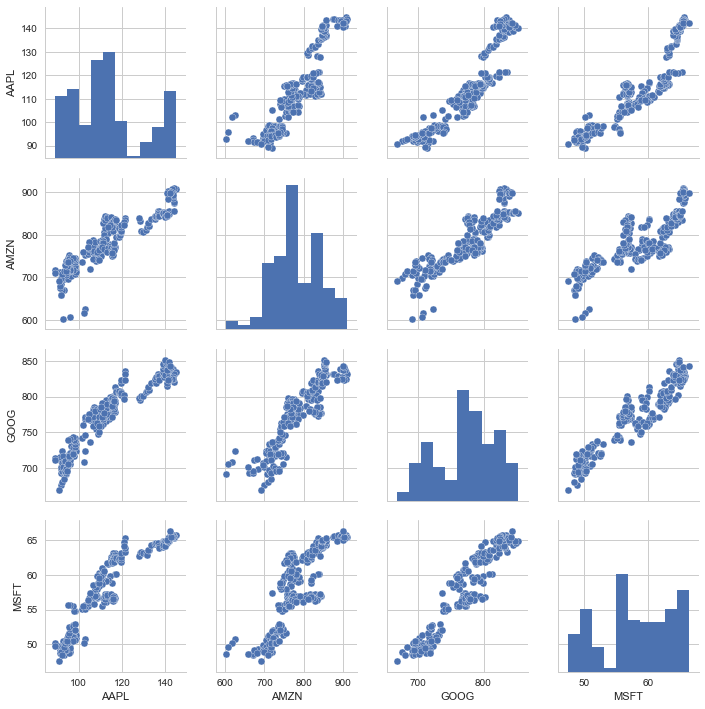

In [37]:
sns.pairplot(closing_df)

In [38]:
'''fig_matrix = sns.PairGrid(stock_rets.dropna())

fig_matrix.map_upper(plt.scatter,color='purple')

fig_matrix.map_lower(sns.kdeplot,cmap='cool_d')

fig_matrix.map_diag(plt.hist,bins=30)'''

"fig_matrix = sns.PairGrid(stock_rets.dropna())\n\nfig_matrix.map_upper(plt.scatter,color='purple')\n\nfig_matrix.map_lower(sns.kdeplot,cmap='cool_d')\n\nfig_matrix.map_diag(plt.hist,bins=30)"

In [39]:
'''fig_matrix = sns.PairGrid(closing_df)

fig_matrix.map_upper(plt.scatter,color='purple')

fig_matrix.map_lower(sns.kdeplot,cmap='cool_d')

fig_matrix.map_diag(plt.hist,bins=30)'''

"fig_matrix = sns.PairGrid(closing_df)\n\nfig_matrix.map_upper(plt.scatter,color='purple')\n\nfig_matrix.map_lower(sns.kdeplot,cmap='cool_d')\n\nfig_matrix.map_diag(plt.hist,bins=30)"

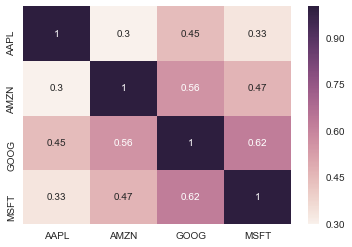

In [40]:
stock_rets_clean=stock_rets.dropna()
correlated = stock_rets_clean.corr()
sns.heatmap(correlated,annot = True)

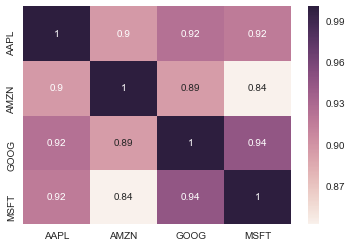

In [41]:
correlated_closing = closing_df.corr()
sns.heatmap(correlated_closing,annot = True)

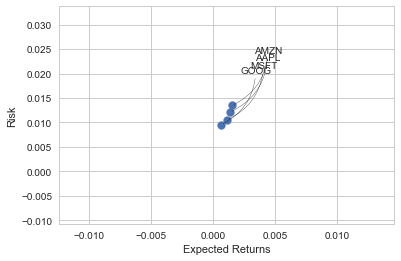

In [42]:
area = np.pi*20
returns = stock_rets.dropna()
plt.scatter(returns.mean(),returns.std(),s=area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')
for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [43]:
#With 95% confidence The most amount that is expected to be lost
returns['AAPL'].quantile(0.05) #95% of the time worst daily loss is 1.7%

-0.01532761030154051

In [44]:
returns['GOOG'].quantile(0.05)

-0.014406293774686963

In [45]:
returns['MSFT'].quantile(0.05)

-0.014499222976642995

In [46]:
returns['AMZN'].quantile(0.05)

-0.01710608937189647

In [47]:

days = 365

dt = 1/days

mu = returns.mean()['GOOG']

sigma = returns.std()['GOOG']

def stock_monte_carlo(start_price,days,mu,sigma):
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        # Calculate Shock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [48]:
GOOG.tail()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2017-04-17,825.010010,837.750000,824.469971,837.169983,892300,837.169983,829.020990,828.178497,828.039199,0.016526
2017-04-18,834.219971,838.929993,832.710022,836.820007,835300,836.820007,828.847992,827.599496,828.745800,-0.000418
2017-04-19,839.789978,842.219971,836.289978,838.210022,954200,838.210022,829.211993,827.986997,829.483199,0.001661
2017-04-20,841.440002,845.200012,839.320007,841.650024,957300,841.650024,830.235998,828.589996,830.176800,0.004104
2017-04-21,842.880005,843.880005,840.599976,843.190002,1319300,843.190002,831.766998,829.870496,830.873000,0.001830


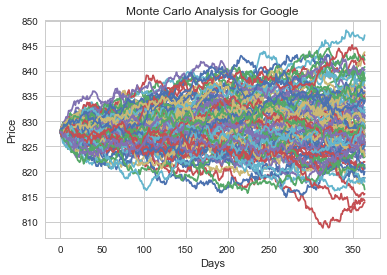

In [49]:
start_price = 827.960022

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [50]:
runs = 10000

simulations = np.zeros(runs)

np.set_printoptions(threshold=5)

for run in xrange(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

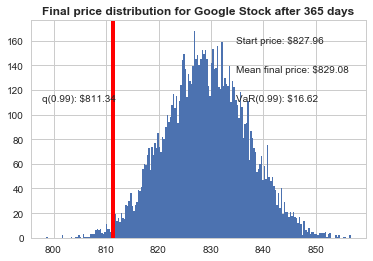

In [51]:
q = np.percentile(simulations, 1)
    
plt.hist(simulations,bins=200)


plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [52]:
#AAPL

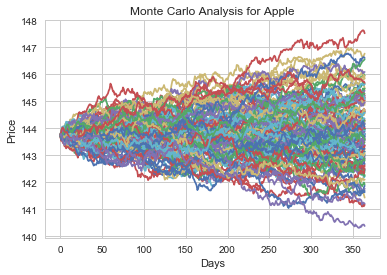

In [69]:
start_price = 143.73

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

In [70]:
runs = 10000

simulations = np.zeros(runs)

np.set_printoptions(threshold=5)

for run in xrange(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

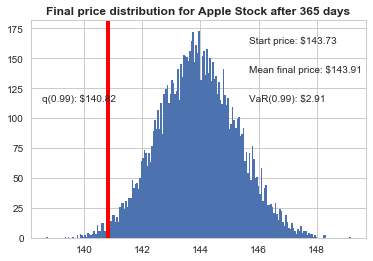

In [72]:
q = np.percentile(simulations, 1)
    
plt.hist(simulations,bins=200)

plt.figtext(0.63, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.63, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.63, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Apple Stock after %s days" % days, weight='bold');

In [56]:
#MSFT

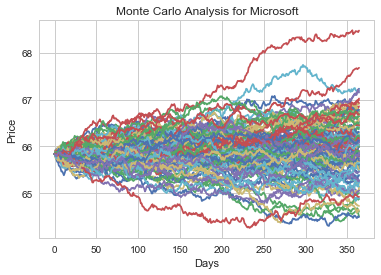

In [66]:
start_price = 65.84

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Microsoft')

In [67]:
runs = 10000

simulations = np.zeros(runs)

np.set_printoptions(threshold=5)

for run in xrange(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

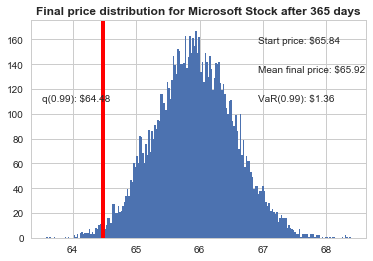

In [68]:
q = np.percentile(simulations, 1)
    
plt.hist(simulations,bins=200)


plt.figtext(0.65, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.65, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.65, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Microsoft Stock after %s days" % days, weight='bold');

In [60]:
#AMZN

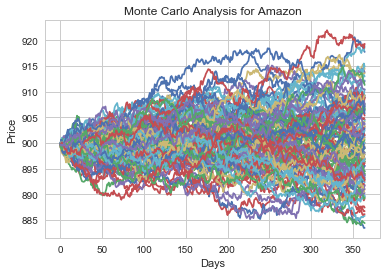

In [61]:
start_price = 899.65

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Amazon')

In [62]:
runs = 10000

simulations = np.zeros(runs)

np.set_printoptions(threshold=5)

for run in xrange(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

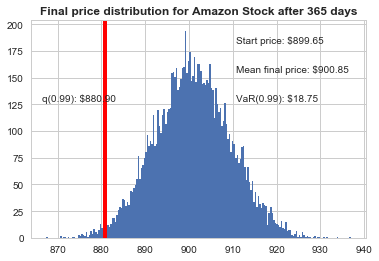

In [63]:
q = np.percentile(simulations, 1)
    
plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Amazon Stock after %s days" % days, weight='bold');